In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from all_class.Graph_cluster import ClusterGraph
import matplotlib.gridspec as gridspec
from scipy.stats import spearmanr, pearsonr

Import the data

In [8]:
data_directory = "data_test/"
df_gfral_score = pd.read_table(data_directory + "mery_scores.csv",sep = ",")
df_result = pd.read_excel(data_directory + "GFRAL_1.xlsx")
df_gfral = pd.read_table(data_directory + "df_GFRAL.tsv",sep = "\t")
df_mabs = pd.read_table(data_directory + "mabs_scores.csv",sep = ",")

In [9]:
df_result.rename(columns={"GDB Clone Name":"Name"}, inplace=True)
df_gfral_score.rename(columns={"mabs_name":"Name"}, inplace=True)
df_gfral = df_gfral.merge(df_result, on="Name", how="left").merge(df_gfral_score, on="Name", how="left")

In [10]:
df_mabs= pd.concat([df_mabs, pd.DataFrame({
    "mabs_name": ["trastuzumab"],
    "SASA Score(lower is better)": [2.8847392725870034],
    "Perplexity Heavy(lower is better)": [2.789269141072481],
    "Perplexity Light(lower is better)": [1.9103034359022153],
})], ignore_index=True)

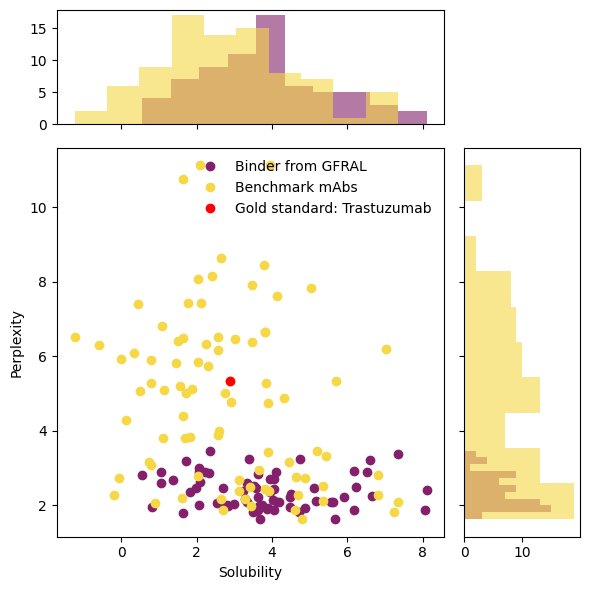

In [11]:
df_gfral["new_perplexity"] = df_gfral["Perplexity Heavy(lower is better)"]*df_gfral["Perplexity Light(lower is better)"]
df_mabs["new_perplexity"] = df_mabs["Perplexity Heavy(lower is better)"]*df_mabs["Perplexity Light(lower is better)"]
# Create figure with subplots
fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(4,4)
ax_main = plt.subplot(gs[1:,:-1])
ax_xhist = plt.subplot(gs[0,:-1], sharex=ax_main)
ax_yhist = plt.subplot(gs[1:,-1], sharey=ax_main)

# Scatter plot
ax_main.plot(df_gfral[df_gfral["new_binding"]=="BINDER"]["SASA Score(lower is better)"],
             df_gfral[df_gfral["new_binding"]=="BINDER"]["new_perplexity"],
             "o", color="#84206b", label="Binder from GFRAL")
ax_main.plot(df_mabs["SASA Score(lower is better)"],
             df_mabs["new_perplexity"],
             "o", color="#f6d746", label="Benchmark mAbs")
ax_main.plot(df_mabs[df_mabs["mabs_name"]=="trastuzumab"]["SASA Score(lower is better)"],
             df_mabs[df_mabs["mabs_name"]=="trastuzumab"]["new_perplexity"],
             "o", color="red", label="Gold standard: Trastuzumab")
# Histograms
ax_xhist.hist(df_gfral[df_gfral["new_binding"]=="BINDER"]["SASA Score(lower is better)"], color="#84206b", alpha=0.6)
ax_xhist.hist(df_mabs["SASA Score(lower is better)"], color="#f6d746", alpha=0.6)
ax_yhist.hist(df_gfral[df_gfral["new_binding"]=="BINDER"]["new_perplexity"], color="#84206b", alpha=0.6, orientation="horizontal")
ax_yhist.hist(df_mabs["new_perplexity"], color="#f6d746", alpha=0.6, orientation="horizontal")

# Labels and legend
ax_main.set_xlabel("Solubility")
ax_main.set_ylabel("Perplexity")
ax_main.legend(frameon=False)

# Remove tick labels from histograms
plt.setp(ax_xhist.get_xticklabels(), visible=False)
plt.setp(ax_yhist.get_yticklabels(), visible=False)

plt.tight_layout()
plt.savefig("GFRAL_binders_vs_mabs.svg")
plt.show()


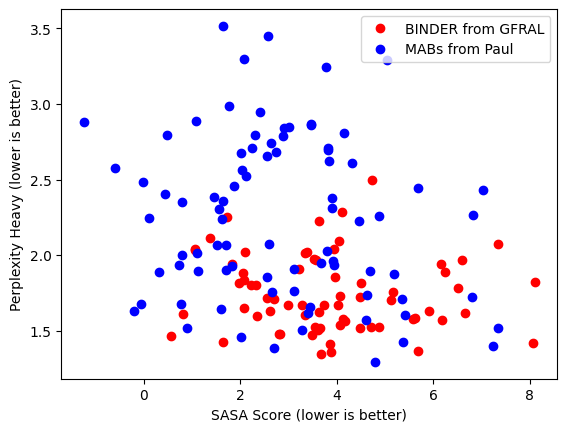

In [12]:
#add histogram on the y and x axis 
plt.plot(df_gfral[df_gfral["new_binding"]=="BINDER"]["SASA Score(lower is better)"], df_gfral[df_gfral["new_binding"]=="BINDER"]["Perplexity Heavy(lower is better)"],"o", color="red")
plt.plot(df_mabs["SASA Score(lower is better)"], df_mabs["Perplexity Heavy(lower is better)"],"o", color="blue")
plt.xlabel("SASA Score (lower is better)")
plt.ylabel("Perplexity Heavy (lower is better)")
plt.legend(["BINDER from GFRAL","MABs from Paul"])

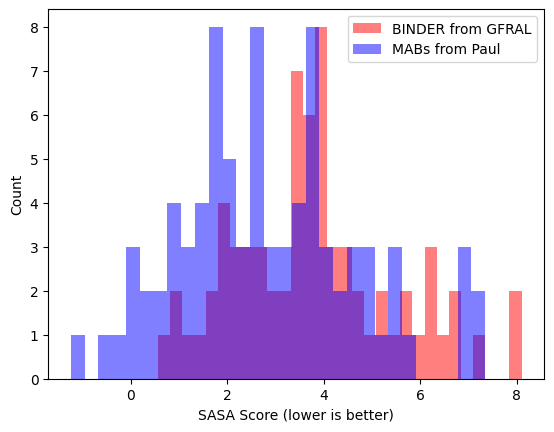

In [13]:
#plot histogram of the four distribution 
plt.hist(df_gfral[df_gfral["new_binding"]=="BINDER"]["SASA Score(lower is better)"], bins=30, alpha=0.5, color="red")
plt.hist(df_mabs["SASA Score(lower is better)"], bins=30, alpha=0.5, color="blue")
plt.xlabel("SASA Score (lower is better)")
plt.ylabel("Count")
plt.legend(["BINDER from GFRAL","MABs from Paul"])
plt.show()

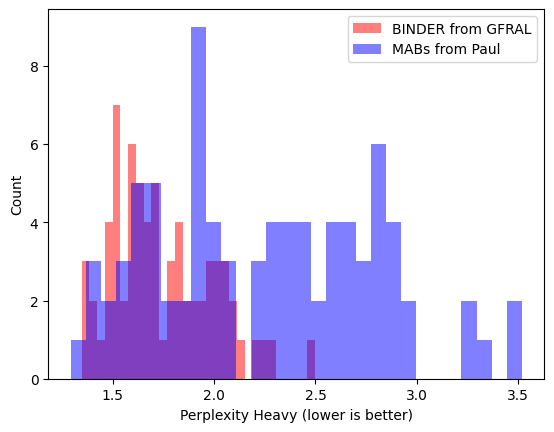

In [14]:
#plot histogram of the four distribution 
plt.hist(df_gfral[df_gfral["new_binding"]=="BINDER"]["Perplexity Heavy(lower is better)"], bins=30, alpha=0.5, color="red")
plt.hist(df_mabs["Perplexity Heavy(lower is better)"], bins=30, alpha=0.5, color="blue")
plt.xlabel("Perplexity Heavy (lower is better)")
plt.ylabel("Count")
plt.legend(["BINDER from GFRAL","MABs from Paul"])
plt.show()

In [15]:
#compute pearson correlation coefficient 
corr, _ = spearmanr(np.log10(df_gfral[df_gfral["new_binding"]=="BINDER"]["ka (1/Ms)"]), df_gfral[df_gfral["new_binding"]=="BINDER"]["SASA Score(lower is better)"])

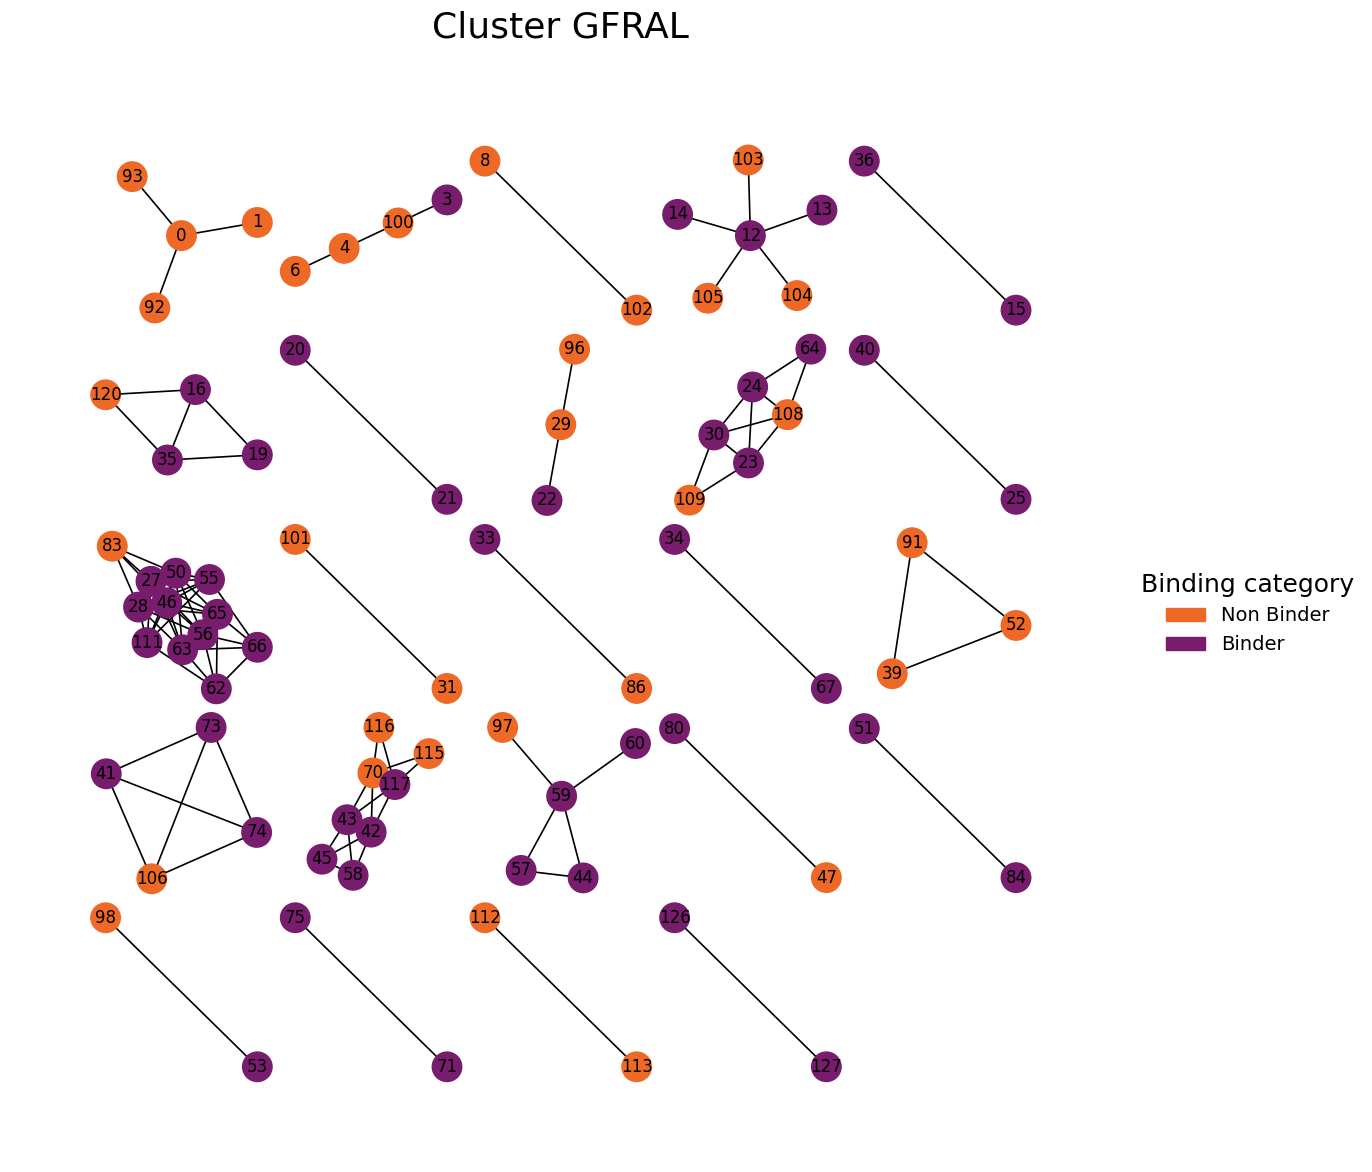

In [17]:
df_gfral["log_KD"] = 210
df_gfral["Binding category"] = df_gfral["new_binding"]
df_gfral["Binding category"] = df_gfral["Binding category"].str.replace("ON","on")
df_gfral["Binding category"] = df_gfral["Binding category"].str.replace("INDER","inder")
# Step 1: Instantiate the class
graph = ClusterGraph(
    df=df_gfral,
    feature="aaSeqCDR3",
    color_feature="Binding category",
    palette="inferno_r",
    size_feature="log_KD"
)

# Step 2: Call the method on the subset
graph.plot_cluster(
    df_gfral,
    distance_threshold=1,  
    min_size = 2,
    title = "Cluster GFRAL",
)
plt.savefig("Cluster_GFRAL.svg")
#plt.savefig("../Plot/Cluster_positive_{}.pdf".format(cl))
plt.show()


Observed fraction: 0.7433628318584071
Random mean: 0.6149380530973452
Random std: 0.03464899115847081
Z-score: 3.7064507354253897


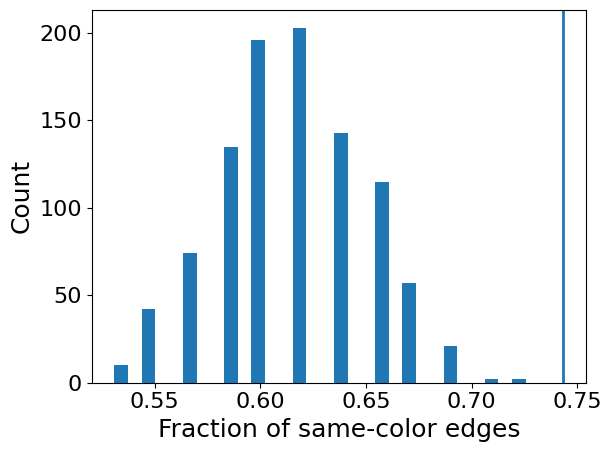

In [18]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Levenshtein import distance

# ---------- build graph (same logic as ClusterGraph) ----------
def build_graph(df, feature, distance_threshold=1, min_size=1):
    df = df.reset_index(drop=True)
    G = nx.Graph()
    G.add_nodes_from(df.index)

    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if distance(df.loc[i, feature], df.loc[j, feature]) <= distance_threshold:
                G.add_edge(i, j)

    if min_size > 1:
        for comp in list(nx.connected_components(G)):
            if len(comp) < min_size:
                G.remove_nodes_from(comp)

    return G, df

# ---------- fraction of same-color edges ----------
def frac_same_color(G, df, color_feature):
    same = 0
    for u, v in G.edges():
        if df.loc[u, color_feature] == df.loc[v, color_feature]:
            same += 1
    return same / G.number_of_edges() if G.number_of_edges() > 0 else np.nan

# ---------- random baseline (degree-preserving) ----------
def random_frac_same_color(G, df, color_feature, n_random=1000):
    n_edges = G.number_of_edges()
    vals = []

    for _ in range(n_random):
        Gr = G.copy()
        nx.double_edge_swap(
            Gr,
            nswap=5 * n_edges,
            max_tries=20 * n_edges
        )
        vals.append(frac_same_color(Gr, df, color_feature))

    return np.array(vals)

# ---------- RUN ----------
G, df_sub = build_graph(
    df_gfral,
    feature="aaSeqCDR3",
    distance_threshold=1,
    min_size=2
)

f_obs = frac_same_color(G, df_sub, "Binding category")
f_rand = random_frac_same_color(G, df_sub, "Binding category", n_random=1000)
z = (f_obs - f_rand.mean()) / f_rand.std()

print("Observed fraction:", f_obs)
print("Random mean:", f_rand.mean())
print("Random std:", f_rand.std())
print("Z-score:", z)

# ---------- quick plot ----------
plt.hist(f_rand, bins=30)
plt.axvline(f_obs, linewidth=2)
plt.xlabel("Fraction of same-color edges")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
